In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')
df=pd.read_csv("/content/drive/MyDrive/top_insta_influencers_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
def convert_units(value):
    if "k" in value:
        var=value.replace("k","")
        result=float(var)*1000
    elif "m" in value:
        var=value.replace("m","")
        result=float(var)*1000000
    elif "b" in value:
        var=value.replace("b","")
        result=float(var)*1000000000
    else:
        result=float(value)
    return result

In [19]:
df["posts"]= df["posts"].apply(convert_units)
df["followers"]= df["followers"].apply(convert_units)
df["avg_likes"]= df["avg_likes"].apply(convert_units)
df["new_post_avg_like"]= df["new_post_avg_like"].apply(convert_units)
df["total_likes"]= df["total_likes"].apply(convert_units)

df.to_csv("newdata.csv")

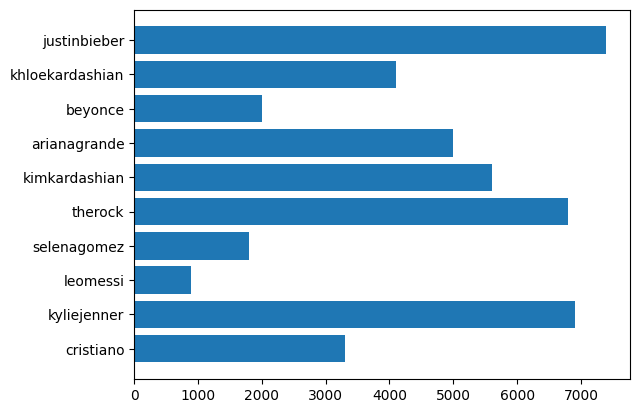

In [20]:
df.sort_values(by="posts",ascending=False)
top_10=df.head(10)

plt.figure()
plt.barh(top_10["channel_info"],top_10["posts"])
plt.show()

Based on the analysis of the top 10 Instagram influencers in the dataset, **Justin Bieber** has the highest number of posts on Instagram.

In [21]:
df

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39%,6500000.0,2.900000e+10,Spain
1,2,kyliejenner,91,6900.0,366200000.0,8300000.0,1.62%,5900000.0,5.740000e+10,United States
2,3,leomessi,90,890.0,357300000.0,6800000.0,1.24%,4400000.0,6.000000e+09,NaN
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97%,3300000.0,1.150000e+10,United States
4,5,therock,91,6800.0,334100000.0,1900000.0,0.20%,665300.0,1.250000e+10,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2300.0,33200000.0,623800.0,1.40%,464700.0,1.400000e+09,United States
196,197,nancyajram,81,3800.0,33200000.0,390400.0,0.64%,208000.0,1.500000e+09,France
197,198,luansantana,79,770.0,33200000.0,193300.0,0.26%,82600.0,1.492000e+08,Brazil
198,199,nickjonas,78,2300.0,33000000.0,719600.0,1.42%,467700.0,1.700000e+09,United States


In [22]:
count=df["country"].value_counts()
top_10_country=count.head(10)

In [23]:
top_10_country

,count
country,
United States,66
Brazil,13
India,12
Indonesia,7
France,6
Spain,5
United Kingdom,4
Colombia,3
Canada,3


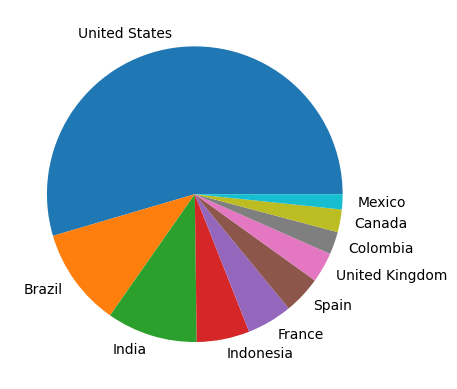

In [24]:
plt.figure()
plt.pie(top_10_country, labels=top_10_country.index)
plt.show()


Based on the analysis of the top 10 countries in the dataset, **United States** is revealed as the country with the highest number of influencers.

In [25]:
df['avg_likes_to_followers'] = df['avg_likes'] / df['followers']

In [26]:
df['avg_likes_to_followers']

,avg_likes_to_followers
0,0.018285
1,0.022665
2,0.019032
3,0.018092
4,0.005687
...,...
195,0.018789
196,0.011759
197,0.005822
198,0.021806


In [27]:
df.to_csv('newdataandcolumn.csv')

In [28]:
top_10_ratio = df.sort_values(by='avg_likes_to_followers', ascending=False).head(10)
print(top_10_ratio)

     rank     channel_info  influence_score  posts   followers   avg_likes  \
140   141              j.m               83   20.0  41900000.0  14200000.0   
102   103              thv               83   60.0  49300000.0  15400000.0   
167   168            rkive               83  110.0  37000000.0  10900000.0   
147   148  jenniferaniston               85   90.0  40700000.0   4600000.0   
155   156         mahi7781               58  100.0  39100000.0   4100000.0   
118   119             zayn               82  160.0  46500000.0   4700000.0   
114   115      harrystyles               57  590.0  46900000.0   4700000.0   
97     98            adele               84  420.0  50700000.0   4700000.0   
186   187      blakelively               80  110.0  34600000.0   3100000.0   
138   139       badbunnypr               83   10.0  42100000.0   3700000.0   

    60_day_eng_rate  new_post_avg_like   total_likes        country  \
140          26.41%         11000000.0  3.681000e+08            NaN   

Based on the analysis of the top 10 ratio, **j.m** has the highest engagement rate among all the influencers in the dataset.

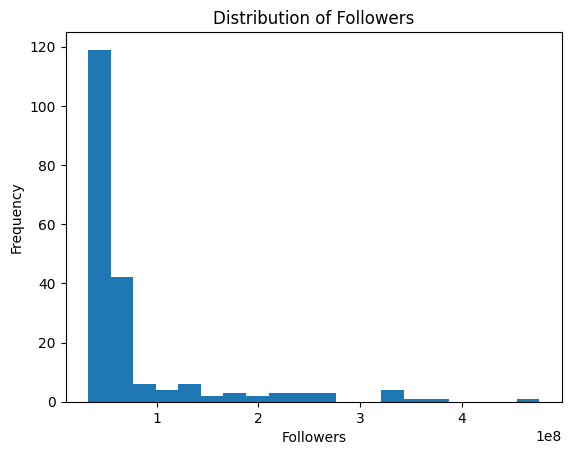

In [29]:
plt.figure()
plt.hist(df['followers'], bins=20)
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.title('Distribution of Followers')
plt.show()




*   A small range of influencers has a large amount of followers.
*   Frequency decreases while the number of followers increases.

The distribution of followers among instagram influencers is heavily right-skewed towards those with fewer followers, with a few outliers having significantly higher follower count.

So, the histogram indicates that most influencers have a relatively small follower count, while only a few have a very large following.



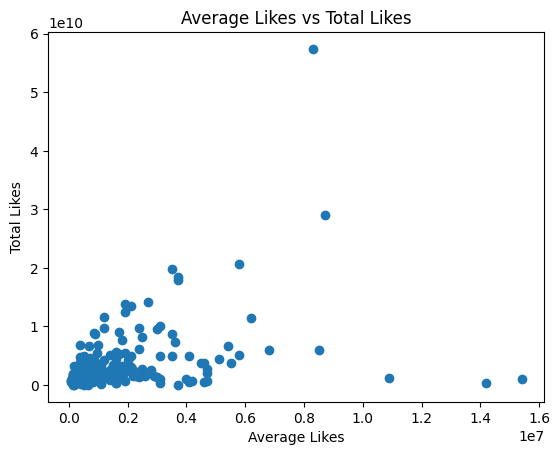

In [30]:
plt.figure()
plt.scatter(df['avg_likes'], df['total_likes'])
plt.xlabel('Average Likes')
plt.ylabel('Total Likes')
plt.title('Average Likes vs Total Likes')
plt.show()


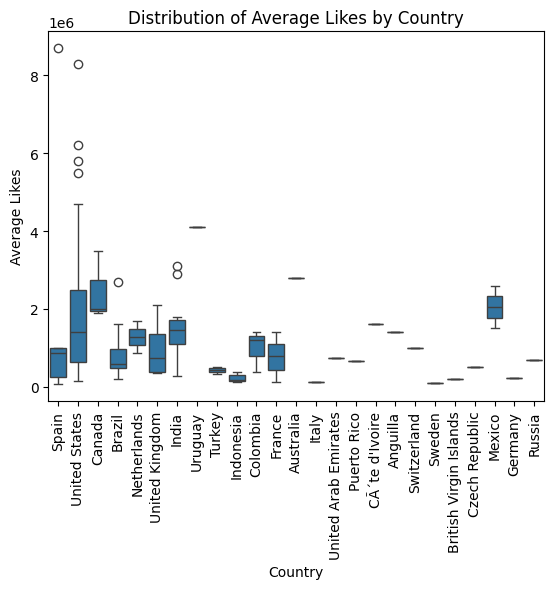

In [31]:
plt.figure()
sns.boxplot(x='country', y='avg_likes', data=df)
plt.xlabel('Country')
plt.ylabel('Average Likes')
plt.title('Distribution of Average Likes by Country')
plt.xticks(rotation=90)
plt.show()

<Figure size 640x480 with 0 Axes>

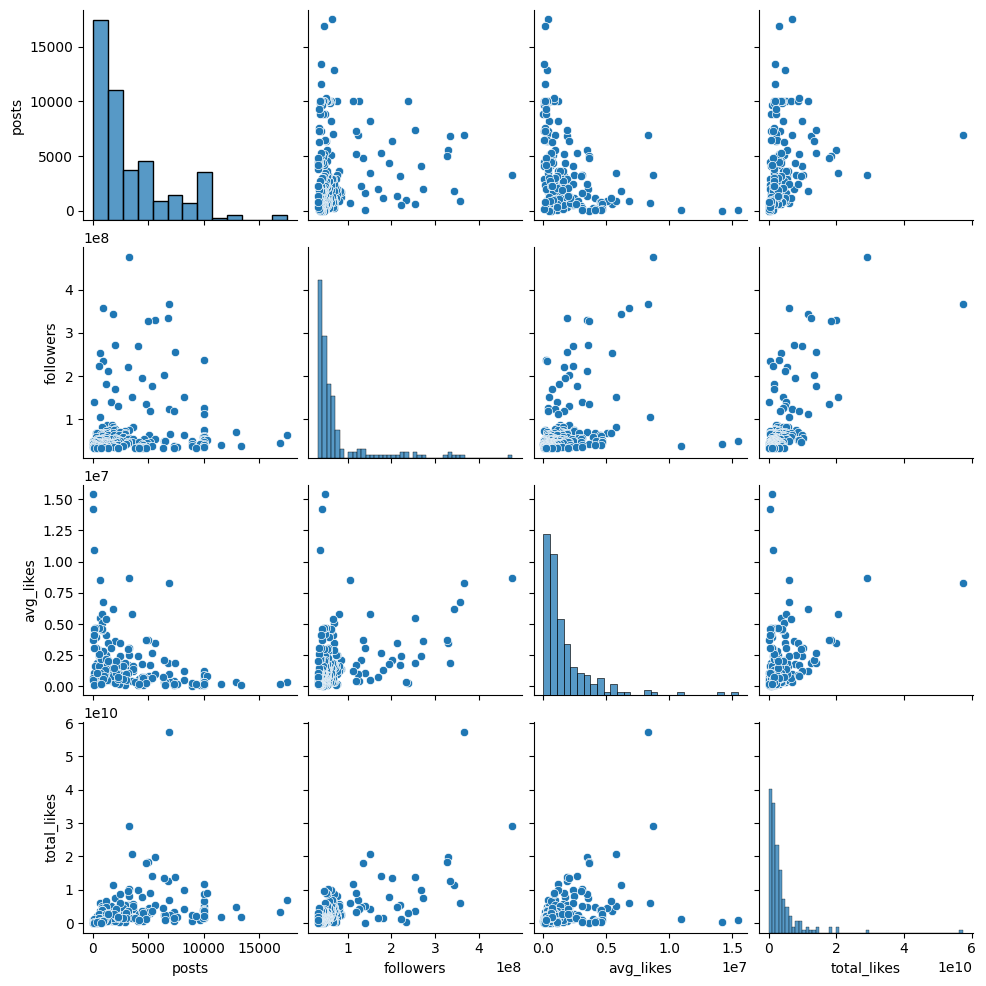

In [32]:
plt.figure()
sns.pairplot(df[['posts', 'followers', 'avg_likes', 'total_likes']])
plt.show()
